이 분석을 통해 알아보고자 하는 것은 각 상황별로 얼마나 차이가 드러나며, 그것을 deeplearning으로 해결할 수 있는가?에  초점을 맞췄다.  
결과적으로 한정적인 조건하에서는 충분히 가능하다는 것이 드러났다.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (16,6)

In [2]:
empty = pd.read_csv('final_empty.csv')
iron = pd.read_csv('final_iron.csv')
concrete = pd.read_csv('final_concrete.csv')
man_l = pd.read_csv('final_man_l.csv')
man_r = pd.read_csv('final_man_r.csv')

In [3]:
print(empty.shape, iron.shape, concrete.shape, man_l.shape, man_r.shape)

(74, 321) (79, 321) (74, 321) (68, 321) (70, 321)


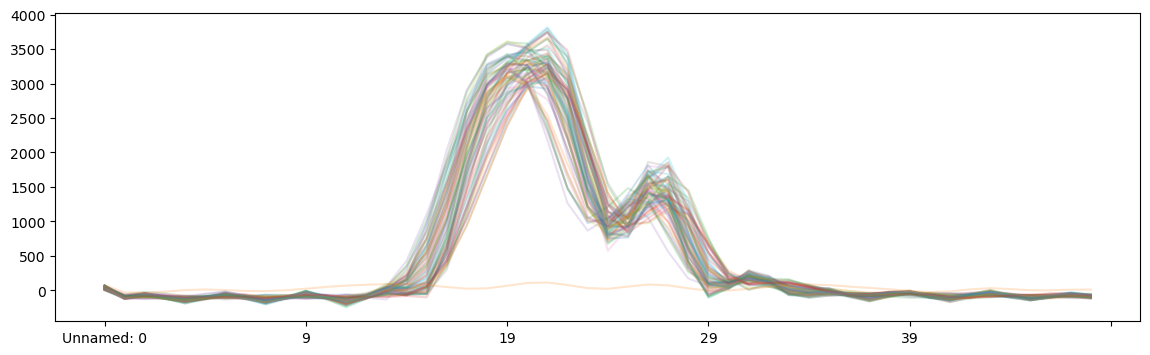

In [7]:
for i in range(len(empty)):
    empty.iloc[i][:50].plot(alpha=0.2)

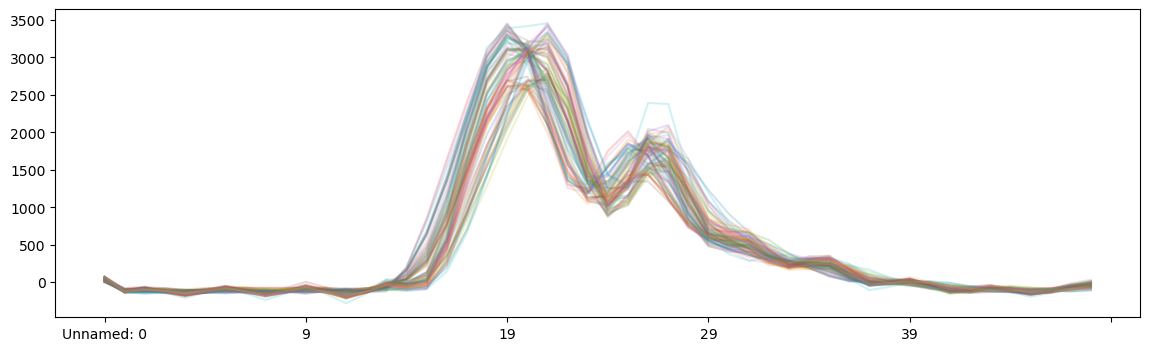

In [8]:
for i in range(len(iron)):
    iron.iloc[i][:50].plot(alpha=0.2)

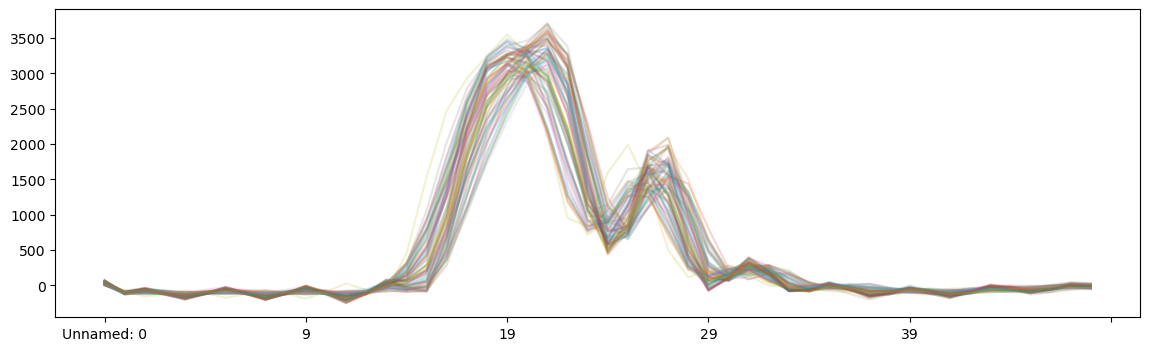

In [9]:
for i in range(len(concrete)):
    concrete.iloc[i][:50].plot(alpha=0.2)

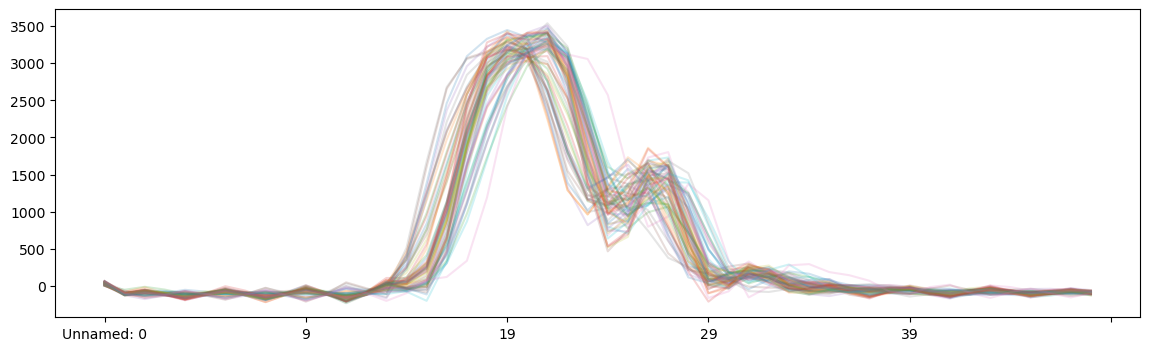

In [10]:
for i in range(len(man_l)):
    man_l.iloc[i][:50].plot(alpha=0.2)

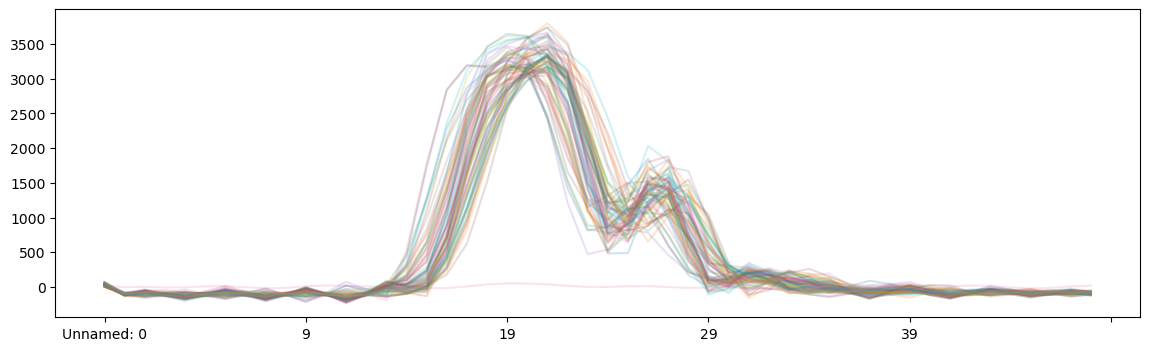

In [11]:
for i in range(len(man_r)):
    man_r.iloc[i][:50].plot(alpha=0.2)

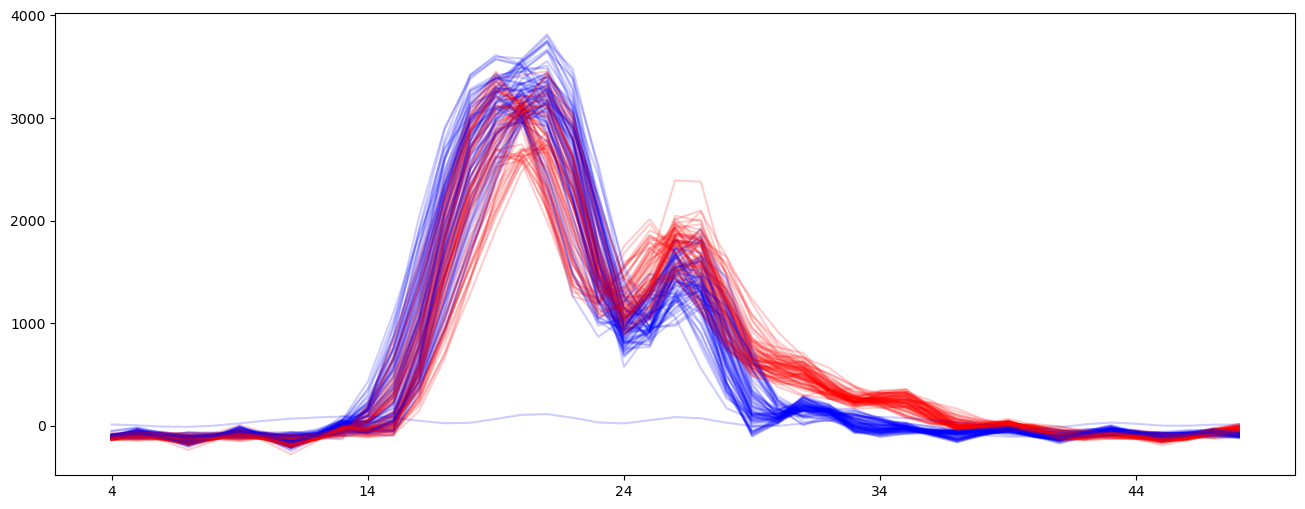

In [21]:
for i in range(min(len(empty), len(iron))):
    empty.iloc[i][5:50].plot(alpha=0.2, color='blue')
    iron.iloc[i][5:50].plot(alpha=0.2, color='red')

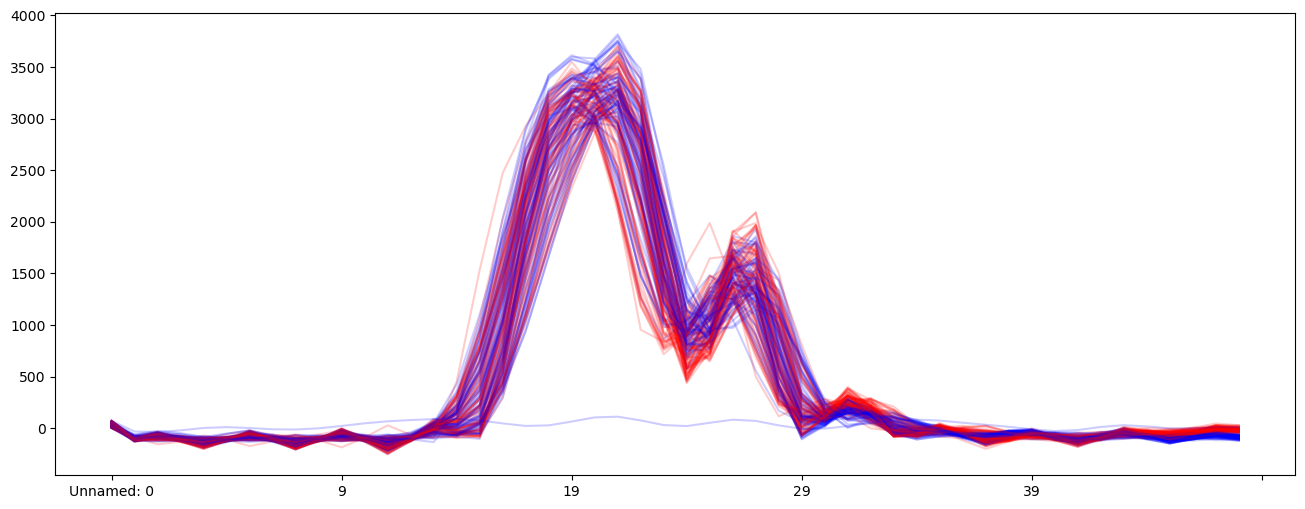

In [22]:
for i in range(min(len(empty), len(concrete))):
    empty.iloc[i][:50].plot(alpha=0.2, color='blue')
    concrete.iloc[i][:50].plot(alpha=0.2, color='red')

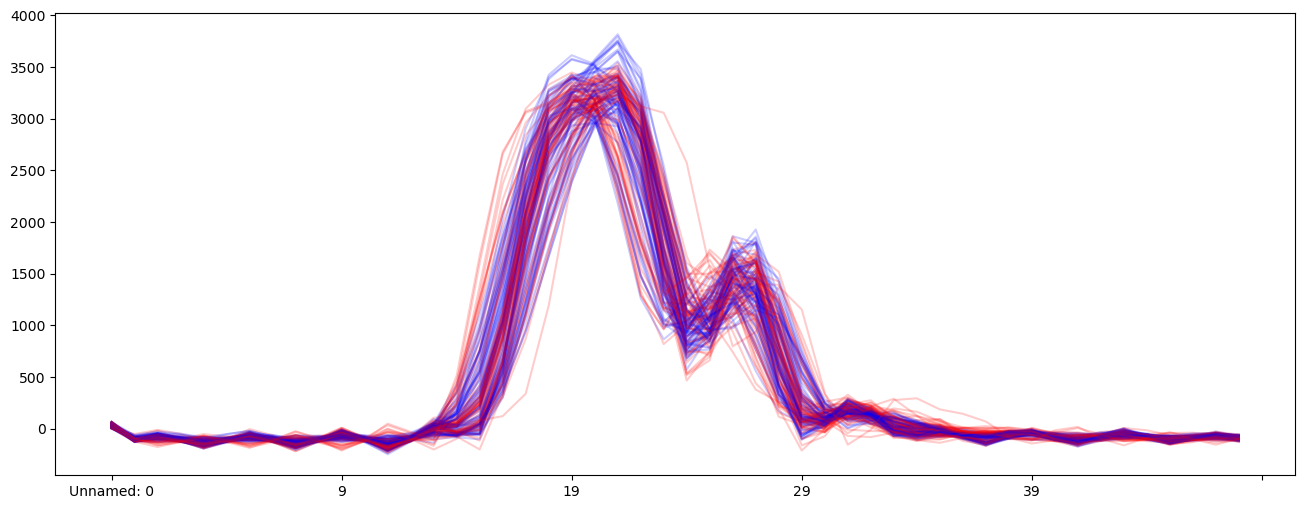

In [24]:
for i in range(min(len(empty), len(man_l))):
    empty.iloc[i][:50].plot(alpha=0.2, color='blue')
    man_l.iloc[i][:50].plot(alpha=0.2, color='red')

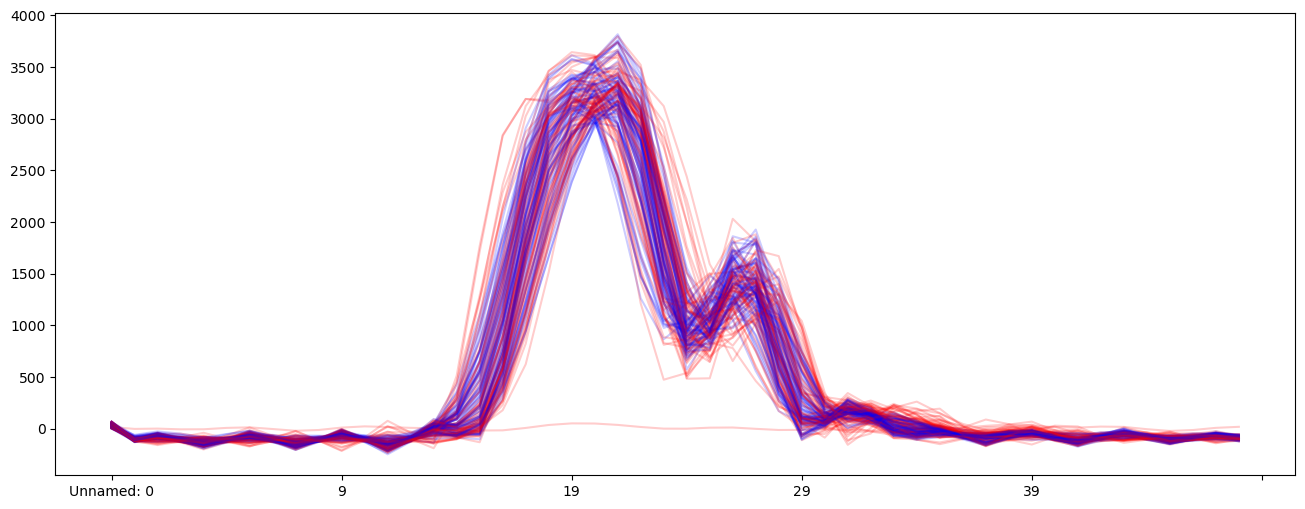

In [23]:
for i in range(min(len(empty), len(man_r))):
    empty.iloc[i][:50].plot(alpha=0.2, color='blue')
    man_r.iloc[i][:50].plot(alpha=0.2, color='red')

In [26]:
x = pd.concat([empty, left_1, left_05, right_1, right_05])
y = [0]*len(empty) + [1]*len(left_1) + [2]*len(left_05) + [3]*len(right_1) + [4]*len(right_05)

# TRAIN: TEST = 8: 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print("x_train: ", len(x_train), "x_test: ", len(x_test), "y_train: ", len(y_train), "y_test: ", len(y_test))

x_train:  236 x_test:  59 y_train:  236 y_test:  59


In [ ]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
y_train = to_categorical(y_train)
x_test = np.expand_dims(x_test, axis=-1)
y_test = to_categorical(y_test)

In [34]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(161,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax')) 
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 158, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 154, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 154, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 150, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 75, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,840 (38.44 KB)

 Trainable params: 9,840 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1635 - loss: 109.1413 - val_accuracy: 0.2203 - val_loss: 39.8031
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2783 - loss: 54.5348 - val_accuracy: 0.2034 - val_loss: 29.7743
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2351 - loss: 40.7638 - val_accuracy: 0.1864 - val_loss: 13.7793
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2765 - loss: 26.4132 - val_accuracy: 0.1695 - val_loss: 12.0656
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1952 - loss: 24.6931 - val_accuracy: 0.1695 - val_loss: 8.0802
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2205 - loss: 21.4755 - val_accuracy: 0.1695 - val_loss: 10.2006
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2599 - loss: 15.1221 - val_accuracy: 0.2034 - val_loss: 5.0526
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2638 - loss: 12.5706 - val_accuracy: 0.1695 - va

In [10]:
x = pd.concat([empty, left_05, right_05])
y = [0]*len(empty) + [1]*len(left_05) + [2]*len(right_05)

# TRAIN: TEST = 8: 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print("x_train: ", len(x_train), "x_test: ", len(x_test), "y_train: ", len(y_train), "y_test: ", len(y_test))

x_train:  130 x_test:  33 y_train:  130 y_test:  33


In [11]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
y_train = to_categorical(y_train)
x_test = np.expand_dims(x_test, axis=-1)
y_test = to_categorical(y_test)

In [13]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(161,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax')) 
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 158, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 154, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 154, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 150, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 75, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,838 (26.71 KB)

 Trainable params: 6,838 (26.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3766 - loss: 66.2331 - val_accuracy: 0.4242 - val_loss: 42.6691
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4118 - loss: 73.8725 - val_accuracy: 0.4242 - val_loss: 20.0895
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4388 - loss: 51.0060 - val_accuracy: 0.4242 - val_loss: 28.8309
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3798 - loss: 41.0063 - val_accuracy: 0.4242 - val_loss: 34.7250
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4240 - loss: 48.2731 - val_accuracy: 0.5455 - val_loss: 4.4538
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4145 - loss: 27.9537 - val_accuracy: 0.3939 - val_loss: 29.5120
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3865 - loss: 35.9748 - val_accuracy: 0.4242 - val_loss: 24.8310
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4553 - loss: 34.4470 - val_accuracy: 0.4242 - va

I think, We have very small data, about each station.  
So first of all, I build the variance based model. And I will collecting more data.

In [56]:
empty_mean = empty.mean()
empty_variances = np.var(empty - empty_mean, axis=1)
for i in range(10):
    print(empty_variances[i])
print("variance mean: ", empty_variances.mean())

5949.177520465363
6019.570639101618
21410.413504804535
5397.386423454164
8638.757299349485
11457.537418641468
10931.268709382311
9111.062925318774
13020.973574439065
14008.39417536087
variance mean:  10955.559593108777


In [51]:
left_1_variance = np.var(left_1 - empty_mean, axis=1)
for i in range(10):
    print(left_1_variance[i])
print("variance mean: ", left_1_variance.mean())

11214.725380725025
11126.514939879204
10560.657192708542
11402.953726644242
11403.727626806622
7467.084559450461
9840.95276114074
13807.636842100312
13634.335462735891
26233.191897207074
variance mean:  11411.353569680203


Empty vs Iron vs Concrete

In [25]:
x = pd.concat([empty, iron, concrete])
y = [0]*len(empty) + [1]*len(iron) + [2]*len(concrete)

# TRAIN: TEST = 8: 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print("x_train: ", len(x_train), "x_test: ", len(x_test), "y_train: ", len(y_train), "y_test: ", len(y_test))

x_train:  181 x_test:  46 y_train:  181 y_test:  46


In [26]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
y_train = to_categorical(y_train)
x_test = np.expand_dims(x_test, axis=-1)
y_test = to_categorical(y_test)

In [27]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(181, 321, 1) (181, 3) (46, 321, 1) (46, 3)


In [57]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(321,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax')) 
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_39 (Conv1D)              │ (None, 318, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_40 (Conv1D)              │ (None, 314, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 314, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 310, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 155, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 3100)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │         9,303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,638 (45.46 KB)

 Trainable params: 11,638 (45.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4256 - loss: 58.1632 - val_accuracy: 0.3256 - val_loss: 27.8521
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3600 - loss: 36.9823 - val_accuracy: 0.3256 - val_loss: 32.0158
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3117 - loss: 33.6010 - val_accuracy: 0.3721 - val_loss: 8.8846
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3446 - loss: 21.5810 - val_accuracy: 0.3488 - val_loss: 10.8122
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3991 - loss: 18.4713 - val_accuracy: 0.3023 - val_loss: 9.2376
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3377 - loss: 15.6783 - val_accuracy: 0.3256 - val_loss: 5.3620
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3485 - loss: 15.4855 - val_accuracy: 0.3721 - val_loss: 7.1823
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4267 - loss: 11.4385 - val_accuracy: 0.3721 - val_loss: 3.

2/2 - 0s - 8ms/step - accuracy: 0.8372 - loss: 0.9868


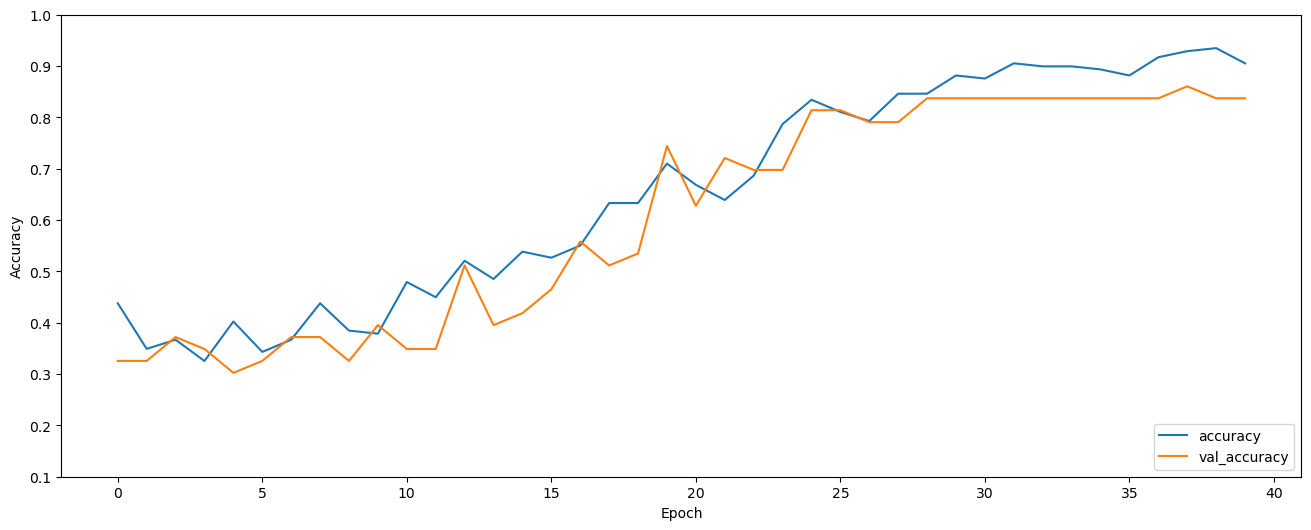

In [58]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Empty vs Iron vs Concrete vs Man

In [59]:
x = pd.concat([empty, iron, concrete, man_r])
y = [0]*len(empty) + [1]*len(iron) + [2]*len(concrete) + [3]*len(man_r)

# TRAIN: TEST = 8: 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print("x_train: ", len(x_train), "x_test: ", len(x_test), "y_train: ", len(y_train), "y_test: ", len(y_test))

x_train:  237 x_test:  60 y_train:  237 y_test:  60


In [60]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
y_train = to_categorical(y_train)
x_test = np.expand_dims(x_test, axis=-1)
y_test = to_categorical(y_test)

In [61]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(237, 321, 1) (237, 4) (60, 321, 1) (60, 4)


In [62]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(321,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax')) 
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test),verbose=1)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_42 (Conv1D)              │ (None, 318, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 314, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 314, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_44 (Conv1D)              │ (None, 310, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 155, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 3100)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │        12,404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739 (57.57 KB)

 Trainable params: 14,739 (57.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2713 - loss: 41.7124 - val_accuracy: 0.2833 - val_loss: 14.8745
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3218 - loss: 17.9707 - val_accuracy: 0.3167 - val_loss: 4.6738
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4066 - loss: 8.8574 - val_accuracy: 0.6167 - val_loss: 4.4935
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6413 - loss: 5.6252 - val_accuracy: 0.6833 - val_loss: 2.6743
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6691 - loss: 4.0271 - val_accuracy: 0.8000 - val_loss: 1.7400
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7990 - loss: 1.7199 - val_accuracy: 0.8500 - val_loss: 0.7388
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8216 - loss: 1.1260 - val_accuracy: 0.8333 - val_loss: 0.8420
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8568 - loss: 0.8279 - val_accuracy: 0.8500 - val_loss: 0.5407
Epoc

2/2 - 0s - 8ms/step - accuracy: 0.9500 - loss: 0.2003


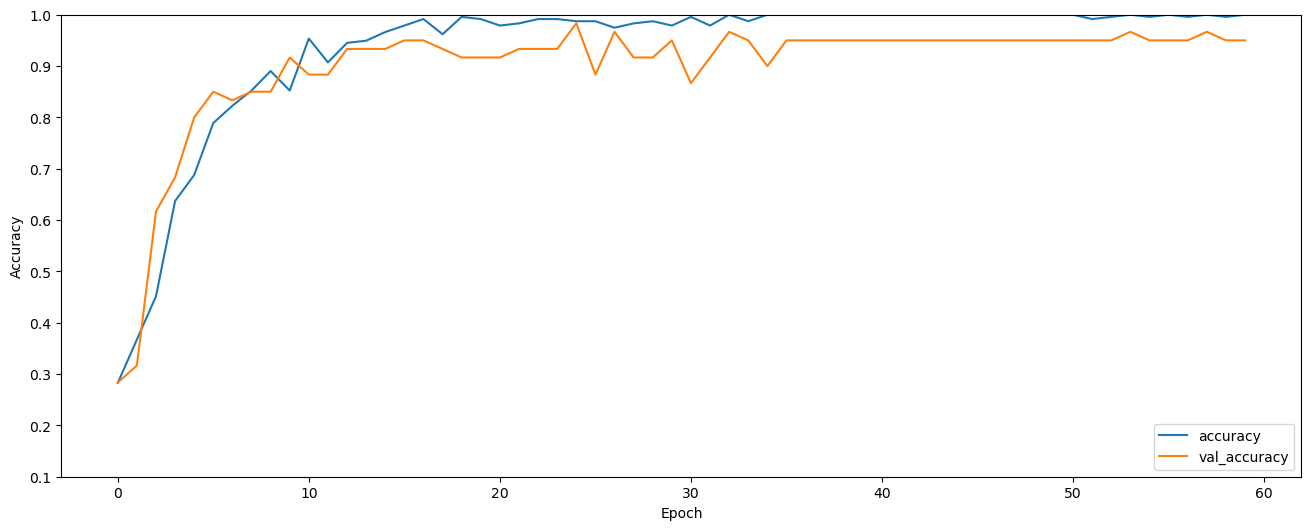

In [63]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [64]:
x = pd.concat([empty, man_r, man_l])
y = [0]*len(empty) + [1]*len(man_r) + [2]*len(man_l)

# TRAIN: TEST = 8: 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print("x_train: ", len(x_train), "x_test: ", len(x_test), "y_train: ", len(y_train), "y_test: ", len(y_test))

x_train:  169 x_test:  43 y_train:  169 y_test:  43


In [65]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
y_train = to_categorical(y_train)
x_test = np.expand_dims(x_test, axis=-1)
y_test = to_categorical(y_test)

In [68]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(321,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax')) 
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_48 (Conv1D)              │ (None, 318, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_49 (Conv1D)              │ (None, 314, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 314, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_50 (Conv1D)              │ (None, 310, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 155, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 3100)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │         9,303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,638 (45.46 KB)

 Trainable params: 11,638 (45.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3065 - loss: 51.8452 - val_accuracy: 0.3256 - val_loss: 26.6159
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2521 - loss: 39.5397 - val_accuracy: 0.3488 - val_loss: 21.2537
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2912 - loss: 23.3913 - val_accuracy: 0.3256 - val_loss: 6.0590
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3789 - loss: 18.5814 - val_accuracy: 0.3721 - val_loss: 14.0224
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3197 - loss: 16.8060 - val_accuracy: 0.3256 - val_loss: 8.1186
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3709 - loss: 12.4064 - val_accuracy: 0.3721 - val_loss: 10.0255
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4132 - loss: 11.4311 - val_accuracy: 0.3488 - val_loss: 13.2153
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4302 - loss: 10.1590 - val_accuracy: 0.3488 - val

2/2 - 0s - 8ms/step - accuracy: 0.8372 - loss: 0.8095


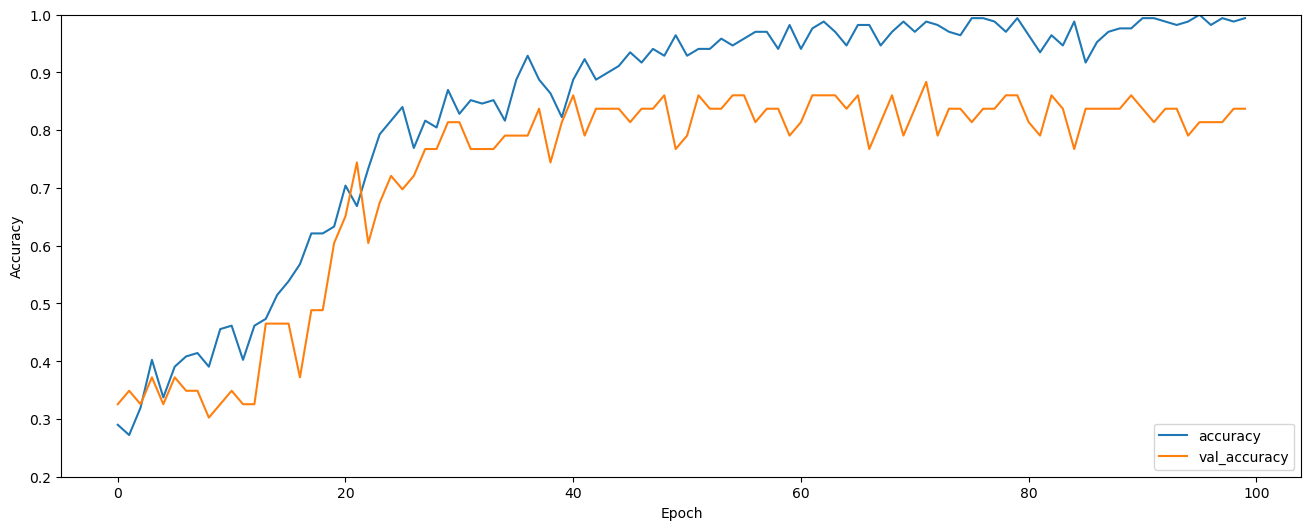

In [69]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)